In [ ]:
#Import Library
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt







In [ ]:
# Download and extract the dataset
!wget --no-check-certificate \
    "https://github.com/krishnabojha/Cataract_Detection-using-CNN/archive/refs/heads/master.zip" \
    -O "/tmp/Katarak.zip"

zip_ref = zipfile.ZipFile('/tmp/Katarak.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2023-06-15 11:01:07--  https://github.com/krishnabojha/Cataract_Detection-using-CNN/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/krishnabojha/Cataract_Detection-using-CNN/zip/refs/heads/master [following]
--2023-06-15 11:01:07--  https://codeload.github.com/krishnabojha/Cataract_Detection-using-CNN/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/Katarak.zip’

/tmp/Katarak.zip        [        <=>         ] 193.79M  15.4MB/s    in 10s     

2023-06-15 11:01:18 (18.7 MB/s) - ‘/tmp/Katarak.zip’ saved [203206994]



In [ ]:
# Set the dataset paths
train_dir = '/tmp/Cataract_Detection-using-CNN-master/Dataset/Train'
test_dir = '/tmp/Cataract_Detection-using-CNN-master/Dataset/Test'

# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
# Set Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


# Build the model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3), name="image_bytes"),  # Rename the input layer
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Train the model
history = model.fit(train_generator, epochs=100, validation_data=test_generator)


Epoch 1/100
253/253 [==============================] - 44s 131ms/step - loss: 0.5700 - accuracy: 0.6901 - val_loss: 0.3733 - val_accuracy: 0.8425
Epoch 2/100
253/253 [==============================] - 34s 136ms/step - loss: 0.4124 - accuracy: 0.8076 - val_loss: 0.3015 - val_accuracy: 0.8637
Epoch 3/100
253/253 [==============================] - 39s 153ms/step - loss: 0.3243 - accuracy: 0.8575 - val_loss: 0.2868 - val_accuracy: 0.8744
Epoch 4/100
253/253 [==============================] - 33s 129ms/step - loss: 0.2735 - accuracy: 0.8798 - val_loss: 0.4279 - val_accuracy: 0.8225
Epoch 5/100
253/253 [==============================] - 33s 129ms/step - loss: 0.2434 - accuracy: 0.8966 - val_loss: 0.1874 - val_accuracy: 0.9237
Epoch 6/100
253/253 [==============================] - 34s 133ms/step - loss: 0.2144 - accuracy: 0.9098 - val_loss: 0.4113 - val_accuracy: 0.8475
Epoch 7/100
253/253 [==============================] - 32s 125ms/step - loss: 0.2057 - accuracy: 0.9134 - val_loss: 0.1854 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_bytes (Conv2D)        (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

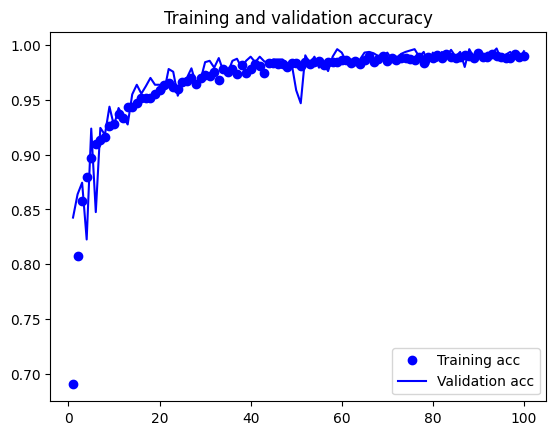

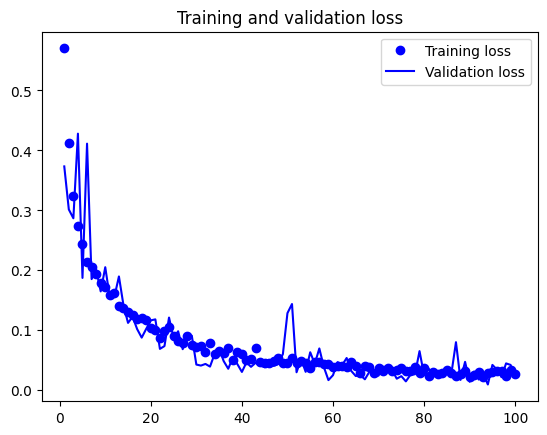

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Untuk TF Lite

from google.colab import files

# Convert the model to TFLite with quantization configuration
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_file_path = '/content/quantized_model.tflite'
with open(tflite_file_path, 'wb') as f:
    f.write(tflite_model)

# Download the TFLite file
files.download(tflite_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Untuk Tensorflow Serving

import tensorflow as tf
import shutil
from google.colab import drive

drive.mount('/content/gdrive')

# Save the trained model as SavedModel
model.save("/content/gdrive/MyDrive/Coursera/model")

# Load the model and compile it
loaded_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Coursera/model")
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Convert SavedModel to .pb format
concrete_function = loaded_model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

# Create a tf.function to get the concrete function
@tf.function(input_signature=[tf.TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name="image_bytes")])
def serving_fn(input):
    return concrete_function(input)

# Get the concrete function
concrete_function = serving_fn.get_concrete_function()

# Save the frozen graph
pb_path = "/content/gdrive/MyDrive/Coursera/model/model.pb"
tf.io.write_graph(graph_or_graph_def=concrete_function.graph,
                  logdir='.',
                  name=pb_path,
                  as_text=False)

print("Model saved in .pb format.")

# Download the .pb file
destination_path = "/content/gdrive/MyDrive/Coursera/model.pb"
shutil.move(pb_path, destination_path)
print("Model downloaded.")


Mounted at /content/gdrive


Model saved in .pb format.
Model downloaded.
